In [15]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from Methods.costs import * 
from Methods.least_squares import * 
from Methods.ridge import *
from Methods.cross_validation import *
from Methods.split_data import *
from Methods.scaling_standardization import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [3]:
from Methods.proj1_helpers import *
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
tX_tra = tX.T
#conc = np.column_stack((y, tX))
#conc_filtered = conc[~(conc == -999).any(1)]
#y = conc_filtered[:,0]
#tX = conc_filtered[:,1:]

## Do your thing crazy machine learning thing here :) ...

# Raw Data Analysis 

### Visualisation of the data

In [4]:
print(np.shape(y))
#print(tX[:,0])
#for x in tX_tra:
#    plt.plot(x)
#    plt.show()

(250000,)


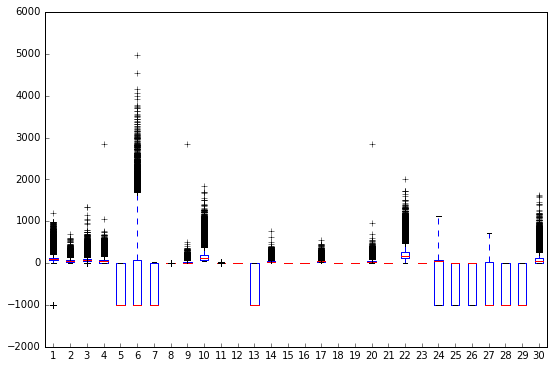

In [5]:
#Boxplot of the Raw Data

boxplot(tX, -2000, 6000, 'boxplot_original')

## Data scaling 

In [12]:
minima_tX = data_scaling(tX.T)
#minima_tX_tra = (tX_tra - tX_tra.min()) / (tX_tra.max() - tX_tra.min())
#minima_tX = minima_tX_tra.T
#print(np.shape(minima_tX))
#print(np.shape(tX))
print(minima_tX)

[[ 0.19040408  0.17587189  0.18360075 ...,  0.16743279  0.16681093
   0.18622379]
 [ 0.19416489  0.17873648  0.18450601 ...,  0.          0.          0.17496312]
 [ 0.          0.19437162  0.18830883 ...,  0.          0.          0.17463252]
 ..., 
 [ 0.18487795  0.17735683  0.17992012 ...,  0.          0.          0.17425438]
 [ 0.18311932  0.17046628  0.17874385 ...,  0.          0.          0.16722523]
 [ 0.          0.17940405  0.17908181 ...,  0.          0.          0.16722523]]


##### Boxplot of the scale data

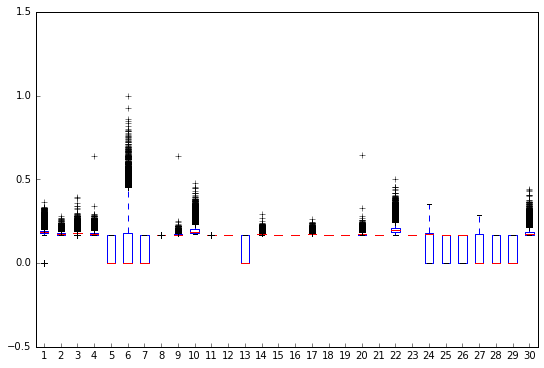

In [13]:
boxplot(minima_tX, -0.5, 1.5, 'boxplot_scaled')

## Data standardization

In [16]:
std_tX = data_standardization(tX.T)
#np.mean(tX, axis=0)
#centered_tX_tra = tX_tra - np.mean(tX_tra, axis=0)
#std_tX_tra = centered_tX_tra / np.std(centered_tX_tra, axis=0)

#std_tX = std_tX_tra.T

#print(std_tX, "\n\n", np.mean(std_tX, axis=0), "\n\n", np.std(std_tX, axis=0))

##### Boxplot of the Standardized data

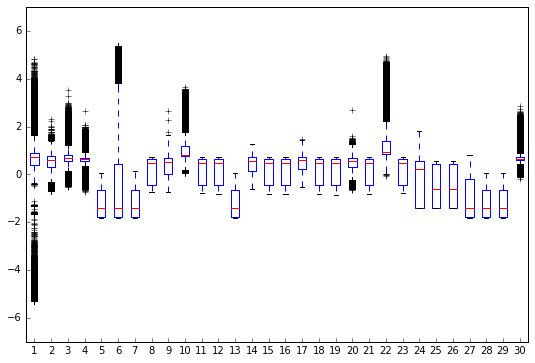

In [17]:
boxplot(std_tX, -7, 7, 'boxplot_standardized')

## Scatter plots

In [ ]:
res = np.column_stack((y, tX[:,12])) # Change with tX[:,i] to plot y against the ith col of tX
res_filt = res[res[:,1] != -999]
plt.scatter(res_filt[:,1], res_filt[:,0])
plt.show()

## Correlations (not useful?)

In [ ]:
for i,col in zip(range(std_tX.T.shape[0]),std_tX.T):
    vec = np.column_stack((y,col))
    #vec_filtered = vec[vec[:,1] > -998]
    print(i, np.corrcoef(vec.T)[0,1])

### Least Squares

In [ ]:
print(np.shape(tX))
mse, w = least_squares(y, tX)
print(w)
print(mse)

### Ridge Regression

In [ ]:
w = ridge_regression(y, tX, 0.1)
print(w)

### TODO: Test with some other transformation: (taking the squared of the data, etc.)

### Cross Validation

In [ ]:
#Data split for the tests
x_tr, y_tr, x_te, y_te = split_data(x, y, ratio=3, seed=1)

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = 'test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = 'sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)